In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('Pokemon.csv')
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


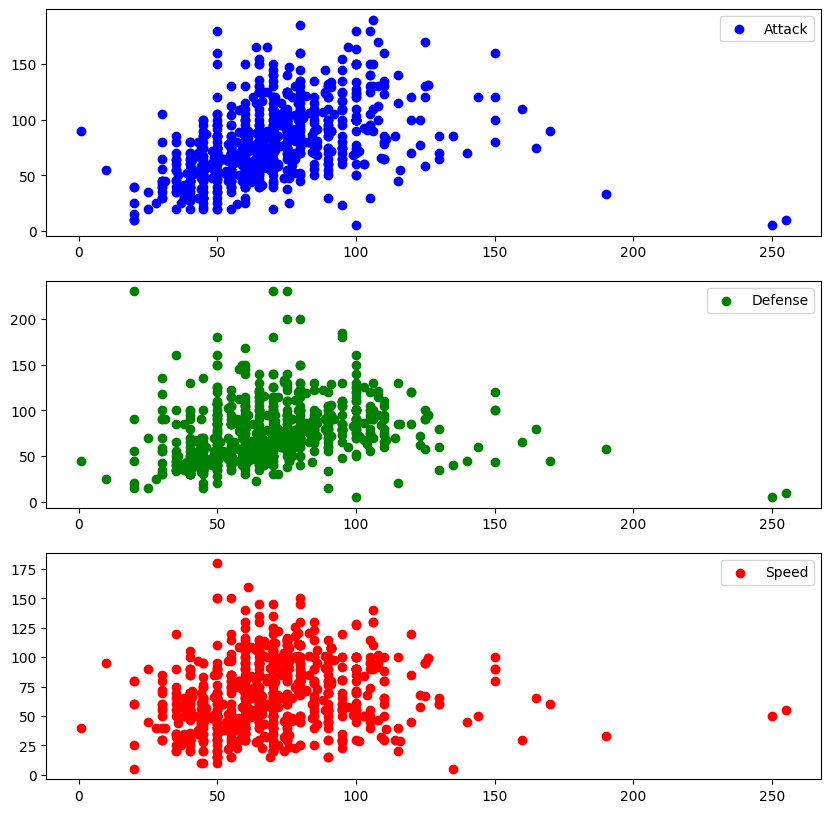

In [3]:
sel = df[['HP','Attack','Defense', 'Speed']]
clist = [x for x in sel.columns if x!= 'HP']
colors = ['blue', 'green', 'red']

fig, ax = plt.subplots(3,1,figsize=(10,10))
for i in range(len(clist)):
    cn = clist[i]
    ax[i].scatter(sel['HP'],sel[cn], label=cn, c=colors[i])
    ax[i].legend()

In [7]:
features = ['HP', 'Attack', 'Defense', 'Speed', 'Generation']
label = 'Legendary'
feat_data = df[features].copy()
label_data = df[label].copy()

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feat_data, label_data, test_size=0.2, random_state=42)

[ True]


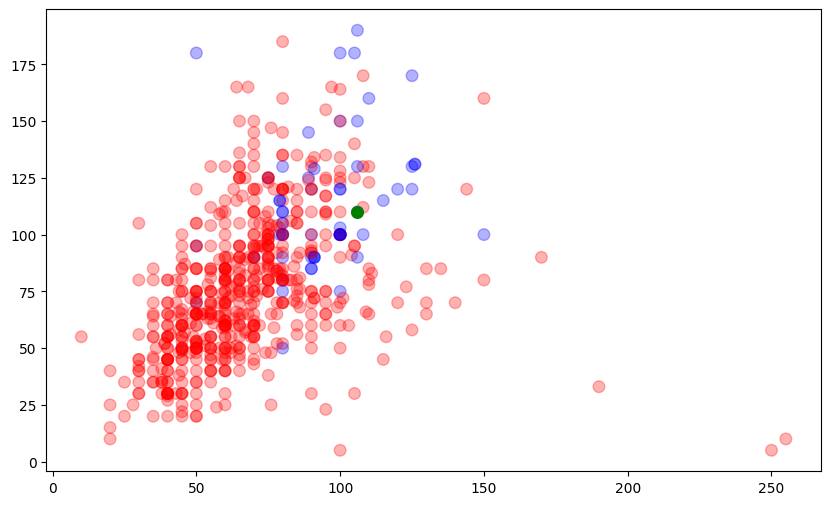

In [14]:
from sklearn import neighbors

n_neighbors = 10

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

n_neighbors = 5
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric='minkowski', p=2)
clf.fit(X_train, y_train)

new_pokemon = pd.DataFrame({'HP': [106], 'Attack': [110], 'Defense': [90], 'Speed': [130], 'Generation': [1]})
pred_label = clf.predict(new_pokemon)

colors = y_train.apply(lambda c: 'blue' if c is True else 'red')

plt.figure(figsize=(10,6))
plt.scatter(X_train['HP'], X_train['Attack'], c=colors, alpha=0.3, s=70)
plt.scatter(new_pokemon.loc[0]['HP'], new_pokemon.loc[0]['Attack'], c='green', s=70)
print(pred_label)

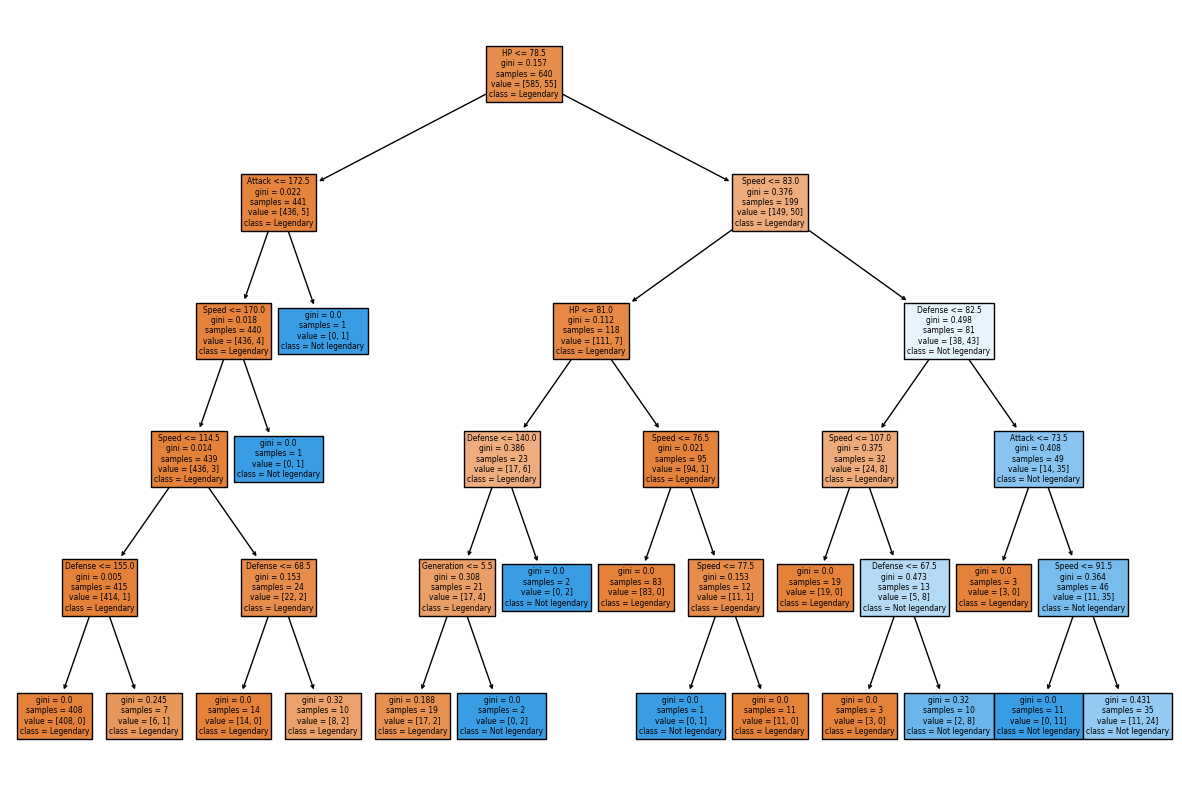

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=['Legendary', 'Not legendary'],
                   filled=True)

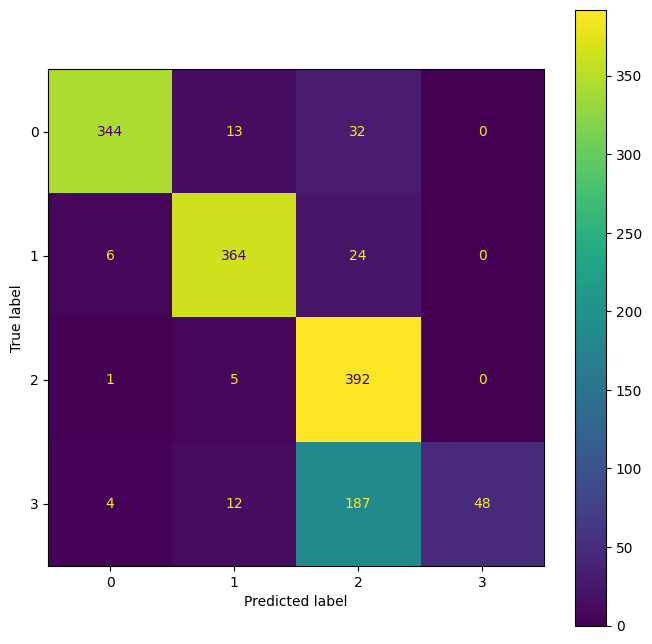

In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

category = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train_data = fetch_20newsgroups(subset="train", categories=category)
test_data = fetch_20newsgroups(subset="test", categories=category)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)

mat = confusion_matrix(test_data.target, predicted_categories)
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pingvin = pd.read_csv('pingvin.csv')
pingvin.drop('sex', axis=1, inplace=True)
pingvin.drop('year', axis=1, inplace=True)
pingvin.dropna(inplace=True)

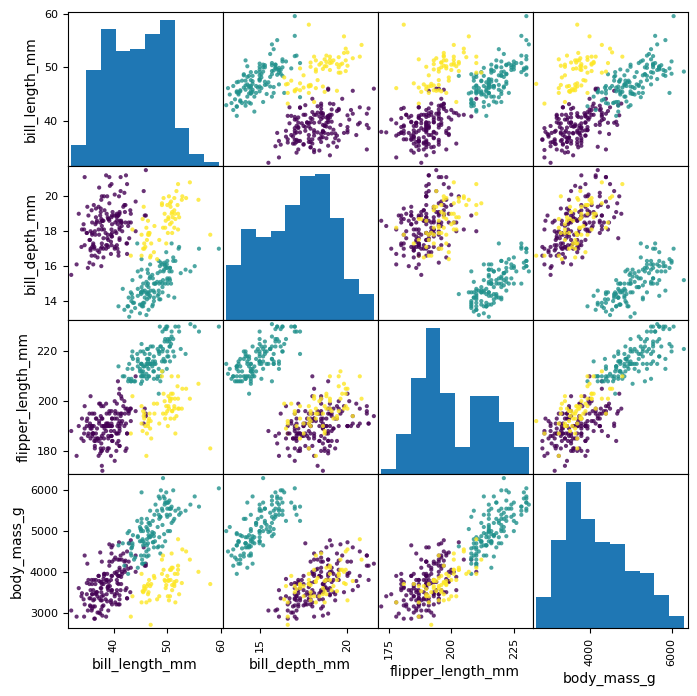

In [34]:
enc = preprocessing.OrdinalEncoder()
encoded = enc.fit_transform(pingvin[['island']])
pingvin['island2'] = encoded
pingvin.drop('island', axis=1, inplace=True)

scaler = StandardScaler()
pingvin_sc = scaler.fit_transform(pingvin.values)

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
clusters = hc.fit_predict(pingvin_sc)
_ = pd.plotting.scatter_matrix(pingvin.loc[:, pingvin.columns != 'island2'], alpha=0.8, figsize=(8,8), c=clusters)

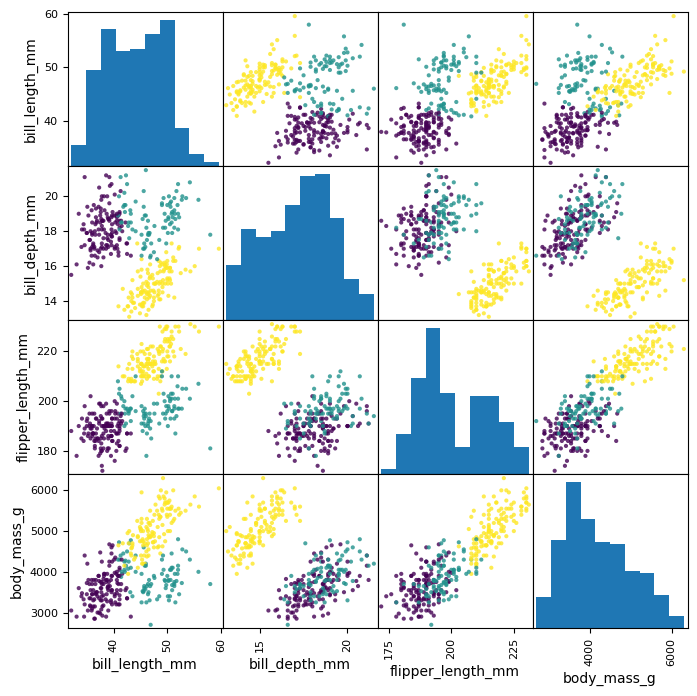

In [35]:
cl = KMeans(n_clusters=3, init='random', n_init=10, max_iter=200)
cl.fit(pingvin_sc)
clusters = cl.predict(pingvin_sc)
_ = pd.plotting.scatter_matrix(pingvin.loc[:, pingvin.columns != 'island2'], alpha=0.8, figsize=(8,8), c=clusters)

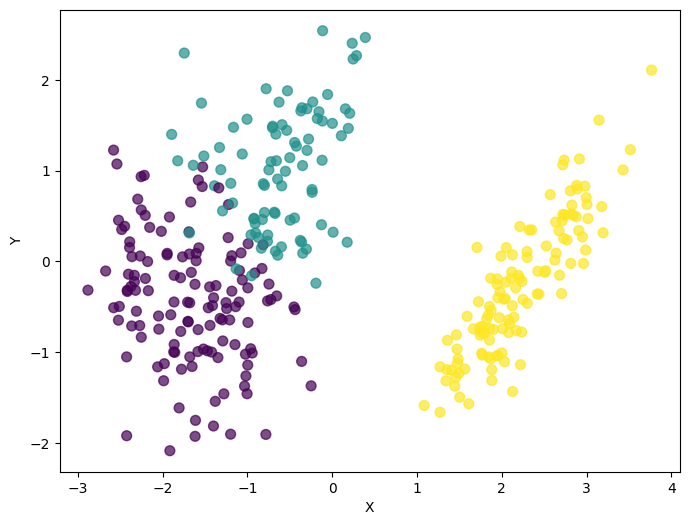

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
stats = pca.fit_transform(pingvin_sc)
plt.figure(figsize=(8,6))
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(stats[:, 0], stats[:, 1], s=50, c=clusters, alpha=0.7)